In [1]:
!nvidia-smi

Sun Jan 21 17:25:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install fastapi
!pip install kaleido
!pip install python-multipart
!pip install uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that ar

In [3]:
!pip install -qU transformers
!pip install -qU hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 70.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 22.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [4]:
import hazm


normalizer = hazm.Normalizer(persian_numbers=False)

def normalize_input(text):
    text = normalizer.normalize(text)
    return text

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

In [5]:
# Load dataset
!git clone https://github.com/aghasemi/ChronologicalPersianPoetryDataset.git poems

Cloning into 'poems'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 39 (delta 2), reused 0 (delta 0), pack-reused 33
Receiving objects: 100% (39/39), 34.27 MiB | 10.35 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [6]:
import json
import os
import glob

import numpy as np
import pandas as pd

from tqdm import tqdm

In [54]:
df = pd.read_csv("/content/poems/poems.tsv", sep="\t")

# Depends on you
# df["poem"] = df["poem"].apply(lambda t: normalize_input(t))

df["text"] = df["poet"] + "<|startoftext|>" + df["poem"].apply(lambda t: t.replace("    ", "<sep>").replace("\t", "<sep>"))
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,poet,century,poem,text
0,رودکی,3,گر من این دوستی تو ببرم تا لب گور بزنم نعره...,رودکی<|startoftext|>گر من این دوستی تو ببرم تا...
1,رودکی,3,به حق نالم ز هجر دوست زارا سحرگاهان چو بر گ...,رودکی<|startoftext|>به حق نالم ز هجر دوست زارا...
2,رودکی,3,به نام نیک تو، خواجه، فریفته نشوم که نام نی...,رودکی<|startoftext|>به نام نیک تو، خواجه، فریف...
3,رودکی,3,دلا، تا کی همی جویی منی را؟ چه داری دوست هر...,رودکی<|startoftext|>دلا، تا کی همی جویی منی را...
4,رودکی,3,گرفت خواهم زلفین عنبرین ترا به بوسه نقش‌کنم...,رودکی<|startoftext|>گرفت خواهم زلفین عنبرین تر...


In [49]:
f = open ("ferdousi.txt","r")
poems = f.readlines()

In [51]:
poems

['ferdousi.txt\n',
 'number of beyts:\t49609\n',
 'به نام خداوند جان و خرد\n',
 'کزین برتر اندیشه برنگذرد\n',
 'خداوند نام و خداوند جای\n',
 'خداوند روزی ده رهنمای\n',
 'خداوند کیوان و گردان سپهر\n',
 'فروزنده ماه و ناهید و مهر\n',
 'ز نام و نشان و گمان برترست\n',
 'نگارندهٔ بر شده پیکرست\n',
 'به بینندگان آفریننده را\n',
 'نبینی مرنجان دو بیننده را\n',
 'نیابد بدو نیز اندیشه راه\n',
 'که او برتر از نام و از جایگاه\n',
 'سخن هر چه زین گوهران بگذرد\n',
 'نیابد بدو راه جان و خرد\n',
 'خرد گر سخن برگزیند همی\n',
 'همان را گزیند که بیند همی\n',
 'ستودن نداند کس او را چو هست\n',
 'میان بندگی را ببایدت بست\n',
 'خرد را و جان را همی سنجد اوی\n',
 'در اندیشهٔ سخته کی گنجد اوی\n',
 'بدین آلت رای و جان و زبان\n',
 'ستود آفریننده را کی توان\n',
 'به هستیش باید که خستو شوی\n',
 'ز گفتار بی کار یکسو شوی\n',
 'پرستنده باشی و جوینده راه\n',
 'به ژرفی به فرمانش کردن نگاه\n',
 'توانا بود هر که دانا بود\n',
 'ز دانش دل پیر برنا بود\n',
 'از این پرده برتر سخن گاه نیست\n',
 'ز هستی مر اندیشه را راه نیست\n

In [52]:
poems[0]

'ferdousi.txt\n'

In [55]:
poets = list(df["poet"].unique())

In [56]:
idx = np.random.randint(0, len(df))
print(idx)
print(df.iloc[idx]["poet"])
print(df.iloc[idx]["poem"])
print(df.iloc[idx]["text"])

35873
صائب تبریزی
جوانی برد با خود آنچه می‌آمد به کار از من    خس و خاری به جا مانده است از چندین بهار از من
صائب تبریزی<|startoftext|>جوانی برد با خود آنچه می‌آمد به کار از من<sep>خس و خاری به جا مانده است از چندین بهار از من


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54524 entries, 0 to 54523
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   poet     54524 non-null  object
 1   century  54524 non-null  int64 
 2   poem     54524 non-null  object
 3   text     54524 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [58]:
import pandas as pd
import numpy as np

from pathlib import Path

import torch
from transformers import AutoTokenizer, AutoConfig, AutoModelWithLMHead
from transformers import AutoTokenizer, GPT2LMHeadModel, GPT2Config

from IPython import display

In [59]:
model_name_or_path = "HooshvareLab/gpt2-fa"

tokenizer = AutoTokenizer.from_pretrained(
    model_name_or_path,
    bos_token='<s>',
    eos_token='</s>',
    pad_token='<pad>',
    unk_token='<unk>'
)
tokenizer.add_special_tokens({
    "bos_token": '</s>',
    "eos_token": '</s>',
    "pad_token": '<pad>',
    "unk_token": '<unk>'
})

config = AutoConfig.from_pretrained(
    model_name_or_path,
    bos_token_id=tokenizer("<s>")["input_ids"][0],
    eos_token_id=tokenizer("</s>")["input_ids"][0],
    pad_token_id=tokenizer("<pad>")["input_ids"][0],
    unk_token_id=tokenizer("<unk>")["input_ids"][0],
)

tokenizer.save_pretrained("/content/gpt2/")
config.save_pretrained("/content/gpt2/")

!wget "https://huggingface.co/HooshvareLab/gpt2-fa/resolve/main/pytorch_model.bin" -P /content/gpt2/
!wget "https://huggingface.co/HooshvareLab/gpt2-fa/resolve/main/tokenizer.json" -P /content/gpt2/

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/728 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/808 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/875k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.75M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/14.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

--2024-01-21 18:07:34--  https://huggingface.co/HooshvareLab/gpt2-fa/resolve/main/pytorch_model.bin
Resolving huggingface.co (huggingface.co)... 13.35.7.57, 13.35.7.81, 13.35.7.5, ...
Connecting to huggingface.co (huggingface.co)|13.35.7.57|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/HooshvareLab/gpt2-fa/46b0b806c740a0f0a9f056f5574c5fa896166fe844945fd3c849bf34365e5060?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27pytorch_model.bin%3B+filename%3D%22pytorch_model.bin%22%3B&response-content-type=application%2Foctet-stream&Expires=1706119654&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNjExOTY1NH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9Ib29zaHZhcmVMYWIvZ3B0Mi1mYS80NmIwYjgwNmM3NDBhMGYwYTlmMDU2ZjU1NzRjNWZhODk2MTY2ZmU4NDQ5NDVmZDNjODQ5YmYzNDM2NWU1MDYwP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=vhyj

In [63]:
tokenizer = AutoTokenizer.from_pretrained(
    "/content/gpt2",
    bos_token='<s>',
    eos_token='</s>',
    pad_token='<pad>'
)

print(tokenizer.encode("سلام بر شما"))
print(tokenizer.encode("<s>"))
print(tokenizer.encode("</s>"))
print(tokenizer.encode("<pad>"))
print(tokenizer.encode("<|startoftext|>"))
print(tokenizer.encode("<sep>"))
print(tokenizer.encode(poems[2]))
poems[2]

[8906, 327, 512]
[0]
[2]
[1]
[6]
[9]
[490, 561, 6733, 1305, 293, 2964, 209]


'به نام خداوند جان و خرد\n'

In [64]:
texts = df["text"].values.tolist()

print(len(texts))

54524


In [67]:
texts

['رودکی<|startoftext|>گر من این دوستی تو ببرم تا لب گور<sep>بزنم نعره ولیکن ز تو بینم هنرا<sep>اثر میر نخواهم که بماند به جهان<sep>میر خواهم که بماند به جهان در اثرا<sep>هر که را رفت، همی باید رفته شمری<sep>هر که را مرد، همی باید مرده شمرا',
 'رودکی<|startoftext|>به حق نالم ز هجر دوست زارا<sep>سحرگاهان چو بر گلبن هزارا<sep>قضا، گر داد من نستاند از تو<sep>ز سوز دل بسوزانم قضا را<sep>چو عارض برفروزی می\u200cبسوزد<sep>چو من پروانه بر گردت هزارا<sep>نگنجم در لحد، گر زان که لختی<sep>نشینی بر مزارم سوکوارا<sep>جهان این است و چونین بود تا بود<sep>و همچونین بود اینند بارا<sep>به یک گردش به شاهنشاهی آرد<sep>دهد دیهیم و تاج و گوشوارا<sep>توشان زیر زمین فرسوده کردی<sep>زمین داده مر ایشان را زغارا<sep>از آن جان تو لختی خون فسرده<sep>سپرده زیر پای اندر سپارا',
 'رودکی<|startoftext|>به نام نیک تو، خواجه، فریفته نشوم<sep>که نام نیک تو دامست و زرق\u200cمر نان را<sep>کسی که دام کند نام نیک از پی نان<sep>یقین بدان تو که دامست نانش مر جان را',
 'رودکی<|startoftext|>دلا، تا کی همی جویی منی را؟<sep>چه داری

In [65]:
# max_seq = max([len(tokenizer.encode(text)) for text in texts])

# print(f'The longest text is {max_seq} tokens long.')

# Due to the limited resources and for the sake of simplicity
# Set to 256
max_seq = 256

In [66]:
from torch.utils.data import Dataset  # this is the pytorch class import
import torch
torch.manual_seed(42)


class MTGDataset(Dataset):

    def __init__(self, txt_list, tokenizer, max_length=1024):

        self.tokenizer = tokenizer  # the gpt2 tokenizer we instantiated
        self.input_ids = []
        self.attn_masks = []

        for txt in txt_list:
            """
            This loop will iterate through each entry in the flavour text corpus.
            For each bit of text it will prepend it with the start of text token,
            then append the end of text token and pad to the maximum length with the
            pad token.
            """

            encodings_dict = tokenizer('<s>' + txt + '</s>',
                                       truncation=True,
                                       max_length=max_length,
                                       padding="max_length")

            """
            Each iteration then appends either the encoded tensor to a list,
            or the attention mask for that encoding to a list. The attention mask is
            a binary list of 1's or 0's which determine whether the langauge model
            should take that token into consideration or not.
            """
            self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
            self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]

In [69]:
from torch.utils.data import random_split

dataset = MTGDataset(texts, tokenizer, max_length=max_seq)

# Split into training and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

f'There are {len(train_dataset)} samples for training, and {len(val_dataset)} samples for validation testing'

'There are 49071 samples for training, and 5453 samples for validation testing'

In [70]:
from torch.utils.data import random_split

dataset = MTGDataset(poems, tokenizer, max_length=max_seq)

# Split into training and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

f'There are {len(train_dataset)} samples for training, and {len(val_dataset)} samples for validation testing'

'There are 89297 samples for training, and 9922 samples for validation testing'

In [71]:
print(train_dataset[0][0][:100])
print(tokenizer.decode(train_dataset[0][0][:100]))

tensor([    0,   286,  1542, 24772,   330,   685,   209,     2,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1])
<s>زواره فرامرز را همچنین
</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad

In [72]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=8
)

validation_dataloader = DataLoader(
    val_dataset,
    sampler=SequentialSampler(val_dataset),
    batch_size=8
)

In [73]:
import random
from transformers import GPT2LMHeadModel, GPT2Config
import numpy as np

# Loading the model configuration and setting it to the GPT2 standard settings.
configuration = GPT2Config.from_pretrained('./gpt2', output_hidden_states=False)

# Create the instance of the model and set the token size embedding length
model = GPT2LMHeadModel.from_pretrained("./gpt2", config=configuration)
model.resize_token_embeddings(len(tokenizer))

# Tell pytorch to run this model on the GPU.
device = torch.device("cuda")
model.cuda()

# This step is optional but will enable reproducible runs.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [74]:
epochs = 3
warmup_steps = 1e2
sample_every = 300

In [75]:
from transformers import AdamW

# AdamW is a class from the huggingface library, it is the optimizer we will be using, and we will only be instantiating it with the default parameters.
optimizer = AdamW(
    model.parameters(),
    lr=5e-4,
    eps=1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [76]:
from transformers import get_linear_schedule_with_warmup

"""
Total training steps is the number of data points, times the number of epochs.
Essentially, epochs are training cycles, how many times each point will be seen by the model.
"""

total_steps = len(train_dataloader) * epochs

"""
We can set a variable learning rate which will help scan larger areas of the
problem space at higher LR earlier, then fine tune to find the exact model minima
at lower LR later in training.
"""
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=total_steps)


In [80]:
tokenizer(sample_input)["input_ids"]
torch.tensor(tokenizer([sample_input])["input_ids"])

tensor([[   0, 4927, 2428,    6]])

In [82]:
sample_poems = poems[np.random.randint(0, len(poems))]
sample_input = f"<s>{sample_poems}<|startoftext|>"
print(sample_input)
sample_input_ids = torch.tensor(tokenizer([sample_input])["input_ids"])
sample_input_ids = sample_input_ids.to(device)

sample_outputs = model.generate(
    input_ids=sample_input_ids,
    # bos_token_id=random.randint(1, len(tokenizer.get_vocab())),
    do_sample=True,
    top_k=50,
    max_length=50,
    top_p=0.95,
    num_return_sequences=1
)
for i, sample_output in enumerate(sample_outputs):
    gen_sample_output = tokenizer.decode(sample_output, skip_special_tokens=False)
    gen_sample_output = gen_sample_output.replace("<|startoftext|>", "\n")
    gen_sample_output = gen_sample_output.replace("<s>", "")
    gen_sample_output = gen_sample_output.replace("</s>", "")
    gen_sample_output = gen_sample_output.replace("<sep>", "\n")

    print(f'Example output: {gen_sample_output}')

<s>ازیراک او را پسر بود هفت
<|startoftext|>
Example output: ازیراک او را پسر بود هفت




In [ ]:
import random
import time
import datetime
from tqdm import tqdm


def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))


total_t0 = time.time()

training_stats = []

model = model.to(device)

for epoch_i in tqdm(range(0, epochs), position=0):

    print(f'Beginning epoch {epoch_i + 1} of {epochs}')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in tqdm(enumerate(train_dataloader), total=len(train_dataloader), position=0):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        model.zero_grad()

        outputs = model(b_input_ids, labels=b_labels, attention_mask=b_masks, token_type_ids=None)

        loss = outputs[0]

        batch_loss = loss.item()
        total_train_loss += batch_loss

        # Get sample every 100 batches.
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)
            print()
            print(f'Batch {step} of {len(train_dataloader)}. Loss:{batch_loss}. Time:{elapsed}')

            model.eval()

            sample_poems = poems[np.random.randint(0, len(poems))]
            sample_input = f"<s>{sample_poems}<|startoftext|>"
            sample_input_ids = torch.tensor(tokenizer([sample_input])["input_ids"])
            sample_input_ids = sample_input_ids.to(device)

            sample_outputs = model.generate(
                input_ids=sample_input_ids,
                # bos_token_id=random.randint(1, len(tokenizer.get_vocab())),
                do_sample=True,
                top_k=50,
                max_length=50,
                top_p=0.95,
                num_return_sequences=1
            )
            for i, sample_output in enumerate(sample_outputs):
                gen_sample_output = tokenizer.decode(sample_output, skip_special_tokens=False)
                gen_sample_output = gen_sample_output.replace("<|startoftext|>", "\n")
                gen_sample_output = gen_sample_output.replace("<s>", "")
                gen_sample_output = gen_sample_output.replace("</s>", "")
                gen_sample_output = gen_sample_output.replace("<sep>", "\n")

                print(f'Example output: {gen_sample_output}')

            model.train()

        loss.backward()
        optimizer.step()
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print()
    print(f'Average Training Loss: {avg_train_loss}. Epoch time: {training_time}')
    print()

    t0 = time.time()

    model.eval()

    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in tqdm(validation_dataloader, total=len(validation_dataloader), position=0):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        with torch.no_grad():

            outputs = model(b_input_ids, attention_mask=b_masks, labels=b_labels)

            loss = outputs[0]

        batch_loss = loss.item()
        total_eval_loss += batch_loss

    avg_val_loss = total_eval_loss / len(validation_dataloader)

    validation_time = format_time(time.time() - t0)

    print()
    print(f'Validation loss: {avg_val_loss}. Validation Time: {validation_time}')
    print()

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print(f'Total training took {format_time(time.time()-total_t0)}')

  0%|          | 0/3 [00:00<?, ?it/s]

Beginning epoch 1 of 3


  3%|▎         | 300/11163 [02:38<1:36:02,  1.89it/s]


Batch 300 of 11163. Loss:0.136688232421875. Time:0:02:39
Example output: همی دامن خویش در خون کشید




  5%|▌         | 600/11163 [05:18<1:33:31,  1.88it/s]


Batch 600 of 11163. Loss:0.1609904170036316. Time:0:05:18
Example output: بخندید و پذرفت ازیشان سپاس




  8%|▊         | 900/11163 [07:57<1:31:02,  1.88it/s]


Batch 900 of 11163. Loss:0.1346302181482315. Time:0:07:58
Example output: چه باید همی نیکویی را ستود




 11%|█         | 1200/11163 [10:37<1:28:16,  1.88it/s]


Batch 1200 of 11163. Loss:0.15507981181144714. Time:0:10:37
Example output: ورا دید پژمرده و زردروی




 13%|█▎        | 1500/11163 [13:16<1:25:38,  1.88it/s]


Batch 1500 of 11163. Loss:0.12860770523548126. Time:0:13:17
Example output: ز بغداد رفتم به فرمان شاه




 16%|█▌        | 1800/11163 [15:56<1:22:31,  1.89it/s]


Batch 1800 of 11163. Loss:0.14053219556808472. Time:0:15:56
Example output: دل شاه ازو پر ز تیمار نیست




 19%|█▉        | 2100/11163 [18:35<1:20:10,  1.88it/s]


Batch 2100 of 11163. Loss:0.14221268892288208. Time:0:18:36
Example output: دگر آنک دارد جهاندار خوار

<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


 21%|██▏       | 2400/11163 [21:15<1:17:37,  1.88it/s]


Batch 2400 of 11163. Loss:0.11694933474063873. Time:0:21:16
Example output: گل اندر زمان برنگینش نهاد




 24%|██▍       | 2700/11163 [23:55<1:15:05,  1.88it/s]


Batch 2700 of 11163. Loss:0.12887580692768097. Time:0:23:55
Example output: تو هم نامداری ز توران سپاه




 27%|██▋       | 3000/11163 [26:34<1:12:11,  1.88it/s]


Batch 3000 of 11163. Loss:0.13309034705162048. Time:0:26:35
Example output: به خط پدر هرمز آن رقعه دید

<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


 30%|██▉       | 3300/11163 [29:14<1:09:49,  1.88it/s]


Batch 3300 of 11163. Loss:0.14648357033729553. Time:0:29:14
Example output: که تیمار و رنجش بباید کشید

<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


 32%|███▏      | 3600/11163 [31:53<1:06:49,  1.89it/s]


Batch 3600 of 11163. Loss:0.12613698840141296. Time:0:31:54
Example output: سزاوارتر زانکه کین آورم




 35%|███▍      | 3900/11163 [34:33<1:04:21,  1.88it/s]


Batch 3900 of 11163. Loss:0.13709913194179535. Time:0:34:33
Example output: بدان تا پس پشت او زین گروه




 38%|███▊      | 4200/11163 [37:12<1:01:36,  1.88it/s]


Batch 4200 of 11163. Loss:0.13251791894435883. Time:0:37:13
Example output: که گشتیم با بخت بیدار جفت

<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


 40%|████      | 4500/11163 [39:52<59:00,  1.88it/s]


Batch 4500 of 11163. Loss:0.12606093287467957. Time:0:39:52
Example output: سپاه خزر گر بیاید به جنگ




 43%|████▎     | 4800/11163 [42:31<56:29,  1.88it/s]


Batch 4800 of 11163. Loss:0.11875325441360474. Time:0:42:32
Example output: سبک سوی گودرز بشتافتند

<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


 46%|████▌     | 5100/11163 [45:11<53:29,  1.89it/s]


Batch 5100 of 11163. Loss:0.13339009881019592. Time:0:45:11
Example output: دوان هر یکی چون هیونی یله

<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


 48%|████▊     | 5400/11163 [47:50<51:06,  1.88it/s]


Batch 5400 of 11163. Loss:0.12880389392375946. Time:0:47:51
Example output: چو داراب از تخت کی گشت شاد

<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


 51%|█████     | 5700/11163 [50:30<48:19,  1.88it/s]


Batch 5700 of 11163. Loss:0.09955049306154251. Time:0:50:31
Example output: جهان زو شود زود زیر و زبر





 54%|█████▎    | 6000/11163 [53:09<45:37,  1.89it/s]


Batch 6000 of 11163. Loss:0.10925598442554474. Time:0:53:10
Example output: مگرمان بیکباره برگشت بخت




 54%|█████▍    | 6046/11163 [53:34<45:10,  1.89it/s]

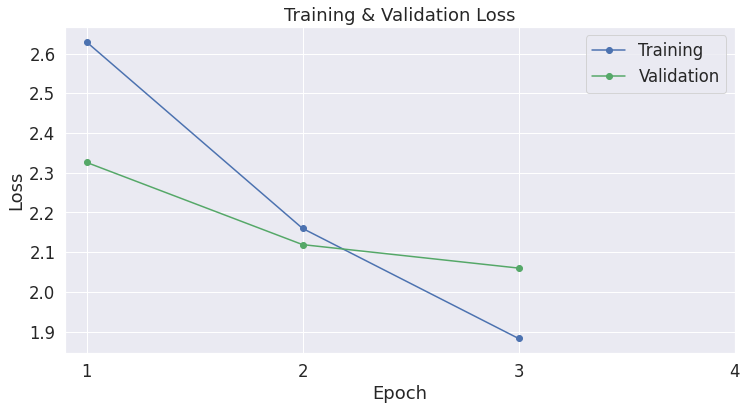

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
import os

output_dir = '/content/gpt2-fa-poetry'
os.makedirs(output_dir, exist_ok=True)

model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
configuration.save_pretrained(output_dir)
!cp /content/gpt2/tokenizer.json /content/gpt2-fa-poetry/

In [ ]:
from transformers import TFAutoModelForCausalLM


tf_model = TFAutoModelForCausalLM.from_pretrained("/content/gpt2-fa-poetry/", from_pt=True)
print(tf_model.summary())
tf_model.save_pretrained("/content/gpt2-fa-poetry-tf")
!cp /content/gpt2-fa-poetry-tf/tf_model.h5 /content/gpt2-fa-poetry
!rm -rf /content/gpt2-fa-poetry-tf

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFGPT2LMHeadModel: ['transformer.h.2.attn.masked_bias', 'transformer.h.9.attn.masked_bias', 'transformer.h.0.attn.masked_bias', 'lm_head.weight', 'transformer.h.1.attn.masked_bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.3.attn.masked_bias', 'transformer.h.5.attn.masked_bias', 'transformer.h.6.attn.masked_bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.10.attn.masked_bias', 'transformer.h.8.attn.masked_bias', 'transformer.h.11.attn.masked_bias']
- This IS expected if you are initializing TFGPT2LMHeadModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2LMHeadModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassifica

Model: "tfgp_t2lm_head_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
transformer (TFGPT2MainLayer multiple                  118099200 
Total params: 118,099,200
Trainable params: 118,099,200
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
!zip -r gpt2-fa-poetry.zip gpt2-fa-poetry

  adding: gpt2-fa-poetry/ (stored 0%)
  adding: gpt2-fa-poetry/added_tokens.json (stored 0%)
  adding: gpt2-fa-poetry/config.json (deflated 51%)
  adding: gpt2-fa-poetry/merges.txt (deflated 74%)
  adding: gpt2-fa-poetry/tokenizer.json (deflated 79%)
  adding: gpt2-fa-poetry/tf_model.h5 (deflated 7%)
  adding: gpt2-fa-poetry/special_tokens_map.json (deflated 47%)
  adding: gpt2-fa-poetry/vocab.json (deflated 73%)
  adding: gpt2-fa-poetry/pytorch_model.bin (deflated 10%)
  adding: gpt2-fa-poetry/tokenizer_config.json (deflated 36%)


In [ ]:
import re


def generator(poet, max_length=128, num_return_sequences=3):
    model.eval()
    prompt = f"<s>{poet}<|startoftext|>"
    print(prompt)

    generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
    generated = generated.to(device)

    decoded_outputs = model.generate(
        generated,
        do_sample=True,
        top_k=50,
        max_length=max_length,
        top_p=0.95,
        num_return_sequences=num_return_sequences
    )


    outputs = []
    for i, output in enumerate(decoded_outputs):
        o = tokenizer.decode(output, skip_special_tokens=False)
        o = o.replace("<s>", "").replace("</s>", "")
        outputs.append(o)



    display.display(display.HTML("""
    <style>
    @import url("https://cdn.jsdelivr.net/gh/rastikerdar/vazir-font@v27.1.0/dist/font-face.css");

    table.xxx {
        margin-right: 15px;
        font-size: 14px;
        direction: rtl !important;
        width: 100%;
        display: flex;
    }
    table.xxx td {
        min-width: 300px !important;
        direction: rtl !important;
        text-align: right !important;
        font-family: "Vazir" !important;
    }
    </style>
    """.strip()))


    df = pd.DataFrame(outputs, columns=["generated"])
    df["generated"] = df["generated"].apply(lambda t: re.sub("\n+", "\n", t.replace("<sep>", "\n")))
    df["generated"] = df["generated"].apply(lambda t: "<p>" + t.replace("\n", "<br/>").replace("<|startoftext|>", "<br/>").strip() + "</p>")


    setup = {
        'border': 2,
        'show_dimensions': True,
        'escape': False,
        'justify': 'right',
        'classes': 'xxx'
    }
    display.display(display.HTML(df.to_html(**setup)))

In [ ]:
print("\n".join(poets))

رودکی
فردوسی
کسایی
ناصرخسرو
منوچهری
فرخی سیستانی
مسعود سعد سلمان
ابوسعید ابوالخیر
باباطاهر
فخرالدین اسعد گرگانی
اسدی توسی
هجویری
خیام
نظامی
عطار
سنایی
خاقانی
انوری
عبدالواسع جبلی
نصرالله منشی
مهستی گنجوی
باباافضل کاشانی
مولوی
سعدی
خواجوی کرمانی
عراقی
سیف فرغانی
حافظ
اوحدی
شیخ محمود شبستری
عبید زاکانی
امیرخسرو دهلوی
سلمان ساوجی
شاه نعمت‌الله ولی
جامی
هلالی جغتایی
وحشی
محتشم کاشانی
شیخ بهایی
عرفی
رضی‌الدین آرتیمانی
صائب تبریزی
فیض کاشانی
بیدل دهلوی
هاتف اصفهانی
فروغی بسطامی
قاآنی
ملا هادی سبزواری
پروین اعتصامی
ملک‌الشعرای بهار
شهریار
رهی معیری
اقبال لاهوری
خلیل‌الله خلیلی
شاطرعباس صبوحی
نیما یوشیج ( آوای آزاد )
احمد شاملو
سهراب سپهری
فروغ فرخزاد
سیمین بهبهانی
مهدی اخوان ثالث
محمدحسن بارق شفیعی
شیون فومنی
کامبیز صدیقی کسمایی
بهرام سالکی
عبدالقهّار عاصی
اِ لیـــار    (جبار محمدی )


In [ ]:
poet = poets[np.random.randint(0, len(poets))]
generator(poet, num_return_sequences=2)

<s>عطار<|startoftext|>


,generated
0,عطارآن روز که چشم می‌رباید گل بر اوچون ابر گریست اشک می‌بارد گل بر اوابرش می‌کند همی از ابر به یک جرعهابرست به صد رنگ زرد و سرخ بر او
1,عطارجانا چو به تو دسترسی داریم مابر بی نشانی تو جرسی داریم ماگر در گذری، به هیچ سر مویم نیستدر هیچ سری نیست کسی داریم ما
